# 练习1-开始了解你的数据
## 探索Chipotle快餐数据

### 步骤1 导入必要的库

In [1]:
import pandas as pd

### 步骤2 从如下地址导入数据集

In [2]:
file_path = './data/chipotle.tsv'

### 步骤3 将数据集存入一个名为chipo的数据框内

- TSV文件和CSV的文件的区别是：前者使用\t作为分隔符，后者使用,作为分隔符。
    - data = pd.read_csv('test.tsv', sep='\t')
    - 如果已有表头，则可使用header参数：
        - data = pd.read_csv('test.tsv', sep='\t', header=0)
    - 如果已有主键列:
        - data = pd.read_csv('test.tsv', sep='\t', header=0, index_col='id')
- 借鉴资料：
    - https://blog.csdn.net/zgljl2012/article/details/79109525

In [3]:
chipo = pd.read_csv(file_path, sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 步骤4 查看前10行内容

In [4]:
chipo.head(10) #tail(10):后10行

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 步骤6 数据集中有多少个列

- 查看列数：
    - len(chipo.columns)
    - chipo.info()
    - chipo.shape[1]
- 查看行数：
    - len(chipo)
    - chipo.shape[0]

In [5]:
#方法一
len(chipo.columns)
#方法二：
chipo.shape[1] 

5

### 步骤7 打印出全部的列名称

In [6]:
chipo.columns #若输出列表：chipo.columns.values; chipo.columns.tolist();list(chipo)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [7]:
list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

### 步骤8 数据集的索引是怎样的

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 步骤9 被下单最多商品(item)是什么

In [9]:
#方法一：
chipo[['item_name', 'quantity']].groupby('item_name').sum().sort_values(by='quantity', ascending=False).head(1)

,quantity
item_name,
Chicken Bowl,761


In [10]:
#方法二：
pd.DataFrame(chipo[['item_name', 'quantity']].groupby('item_name').sum().sort_values(by='quantity', ascending=False).iloc[0,:])

,Chicken Bowl
quantity,761


In [11]:
#方法三：分组后采用agg函数求和，多个函数agg({'quantity':['sum', 'mean']})
#相关资料：https://blog.csdn.net/weixin_45144170/article/details/105008350
chipo[['item_name', 'quantity']].groupby('item_name').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).head(1)

,quantity
item_name,
Chicken Bowl,761


### 步骤10 在item_name这一列中，一共有多少种商品被下单？

- pandas 之unique()函数与nunique()函数区别：
    - （1）unique()是以数组形式（numpy.ndarray）返回所选列的所有唯一值（特征的所有唯一值）:
    - （2）nunique() 返回的是唯一值的个数；
        - chipo['item_name'].nunique()
        - 等同于用法：len(len(chipo['item_name'].unique()))
- 相关资料：
    - https://blog.csdn.net/w_shuo/article/details/109285325

In [12]:
#方法一：
len(chipo['item_name'].unique())
#方法二：
len(chipo.groupby('item_name'))
#方法三：
chipo['item_name'].nunique()

50

### 步骤11 在choice_description中，下单次数最多的商品是什么？

In [13]:
chipo[['choice_description', 'order_id']].groupby('choice_description').count().sort_values(by='order_id', ascending=False).head(1)

,order_id
choice_description,
[Diet Coke],134


### 步骤12 一共有多少商品被下单

In [14]:
chipo['quantity'].sum()

4972

### 步骤13 将item_price转换为浮点数

- 转换浮点数：
    - 法一：astype()
    - 法二：apply(lambda x : folat(x[1:]))

In [15]:
#方法一：
chipo['item_price'] = chipo['item_price'].str.strip('$').astype('float')
chipo['item_price']
#方法二：
#chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### 步骤14 在该数据集对应的时期内，收入(revenue)是多少?

In [16]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("收入(revenue):{}".format(revenue))

收入(revenue):39237.02


### 步骤15 在该数据集对应的时期内，一共有多少订单？

In [17]:
#方法一：
len(chipo['order_id'].unique())
#方法二：
chipo['order_id'].nunique()

1834

### 步骤16 每一单(order)对应的平均总价是多少？

In [18]:
#先算出小单总价，然后再计算每一订单的均价
chipo['item_price_sum'] = chipo['quantity'] * chipo['item_price']
chipo[['order_id', 'item_price_sum']].groupby('order_id').mean('item_price_sum')

,item_price_sum
order_id,
1,2.890000
2,33.960000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000
1832,6.600000


### 步骤17 一共有多少种不同的商品被售出？

In [19]:
chipo['item_name'].nunique()

50

# 练习2 数据过滤与排序
## 探索2012欧洲杯数据

### 步骤1 导入必要的库

In [20]:
import pandas as pd

### 步骤2 从以下地址导入数据集

In [21]:
filepath2 = './data/Euro2012.csv'

### 步骤三 将数据集命名为euro12

In [22]:
euro12 = pd.read_csv(filepath2, sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### 步骤4 只选取Goals这一列

In [23]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


### 步骤5 有多少球队参与了2012欧洲杯？

In [24]:
#方法一：
euro12['Team'].nunique()
#方法二:
len(euro12['Team'].unique())
#方法三：
len(euro12.groupby('Team'))

16

### 步骤6 该数据集中一共有多少列(columns)？

In [25]:
#法一:
len(euro12.columns)
#法二：
euro12.shape[1]

35

### 步骤7 将数据集中的列Team，Yellow Cards和Red Cards单独存为一个名叫discipline的数据框

In [26]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### 步骤8 对数据框discipline按照先Red Cards，再Yellow Cards进行排序

In [27]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


### 步骤9 计算每个球队拿到的黄牌数的平均值

In [28]:
discipline[['Team', 'Yellow Cards']].groupby('Team').mean()

,Yellow Cards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


### 步骤10 找到进球数Goals超过6的球队数据

In [29]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### 步骤11 选取以字母G开头的球队数据

- Pandas提取含有指定字符串的行或列:
    - 完全匹配：
        - ==
    - 部分匹配:
        - str.contains()：包含一个特定的字符串
            - 参数na：缺少值NaN处理
            - 参数case：大小写的处理
            - 参数regex：使用正则表达式模式
        - str.endswith()：以特定字符串结尾
        - str.startswith()：以特定的字符串开头
        - str.match()：匹配正则表达式模式
        - 注：要提取部分匹配的行，可以使用pandas的（str.xxx（））方法，根据指定条件提取的字符串方法。
- 相关资料：https://blog.csdn.net/nixiang_888/article/details/109371043

In [30]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### 步骤12 选取前7列

In [31]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### 步骤13 选取除了最后三列之外的全部列

In [32]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### 步骤14 找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射正率(Shooting Accuracy)

In [33]:
#方法一：
euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])] [['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [34]:
#方法二：
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# 练习3 - 数据分组
## 探索酒类消费数据

### 步骤1 导入必要的库

In [35]:
import pandas as pd
import numpy as np

### 步骤2 从路径地址导入数据

In [36]:
filepath3 = "./data/drinks.csv"

### 步骤3 将数据框命名为drinks

In [37]:
drinks = pd.read_csv(filepath3)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### 步骤4 哪个大陆（continent）平均消耗的啤酒（beer）更多？

In [38]:
drinks[['continent', 'beer_servings']].groupby('continent').mean().sort_values(by='beer_servings',ascending=False).head(1)

,beer_servings
continent,
EU,193.777778


### 步骤5 打印出每个大陆(continent)的红酒消耗(wine_servings)的描述性统计值

In [39]:
drinks[['continent', 'wine_servings']].groupby('continent').describe()

wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
OC         212.0  
SA         221.0

### 步骤6 打印出每个大陆每种酒类别的消耗平均值

In [40]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### 步骤7  打印出每个大陆每种酒类别的消耗中位数

In [41]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### 步骤8 打印出每个大陆对spirit饮品消耗的平均值，最大值和最小值

- agg()函数：
    - 聚合函数，对分组后数据进行聚合，默认情况对分组后其他列进行聚合。
    - DataFrame.agg（func，axis = 0，* args，** kwargs ）
        - 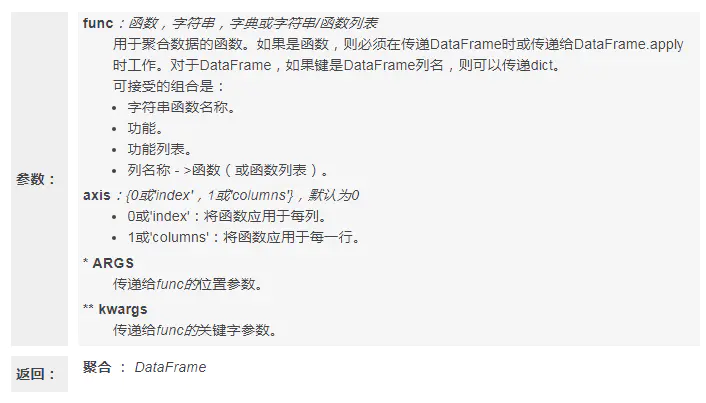
- 例：
    - 1.使用agg求出当前数据对应的统计量
        - df[['salary', 'score']].agg([np.sum])
    - 2.使用agg分别求字段的不同统计量
        - df.agg({'salary' : np.sum, 'score' : np.mean})
    - 3.使用agg方法求不同字段的不同数目统计量
        - df.agg({'salary' : np.sum, 'score' : [np.sum, np.mean]})
    - 4.在agg方法中使用自定义函数
        - df.agg({'salary' : 自定义函数}, axis=0)
- 相关资料：
    - https://blog.csdn.net/jcjic/article/details/109839096

In [42]:
drinks[['continent', 'spirit_servings']].groupby('continent').agg(['mean', 'min', 'max'])

spirit_servings         
                     mean min  max
continent                         
AF              16.339623   0  152
AS              60.840909   0  326
EU             132.555556   0  373
OC              58.437500   0  254
SA             114.750000  25  302

# 练习4 - Apply函数
## 探索1960-2014美国犯罪数据

### 步骤1 导入必要的库

In [43]:
import pandas as pd
import numpy as np

### 步骤2 从路径地址导入数据集

In [44]:
filepath4 = "./data/US_Crime_Rates_1960_2014.csv"

### 步骤3 将数据框命名为crime

- pd.read_csv()||pd.to_csv()索引问题index:
    - to_csv()存储时不加索引
        - df.to_csv(path, index= False, header= False)
    - read_csv()读取时声明第一列是索引,第一行是索引
        - df = pd.read_csv(path, index_col= 0, header= 0)
        - header = 0 # 源文件第一行作为读取后的列索引
        - header = None # 源文件没有列索引，自动为其添加
        - index_col = None # 源文件没有行索引，自动为其添加，把原来其自己的行索引视为新的一列
        - index_col = 0  # 指定源文件第一列作为行索引
- 相关资料:
    - https://blog.csdn.net/The_Time_Runner/article/details/88353161

In [45]:
crime = pd.read_csv(filepath4, index_col = 0)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 步骤4 每一列(column)的数据类型是什么样的？

In [46]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.6 KB


### 步骤5 将Year的数据类型转换为datetime64

In [47]:
crime.Year = pd.to_datetime(crime.Year,format='%Y')
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 步骤6 将Year设置为数据框索引

In [48]:
crime.set_index('Year', inplace=True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 步骤7 删除名为Total的列

- pandas删除某一列的方法:
    - https://blog.csdn.net/weixin_30376453/article/details/99357384?utm_term=pandas%E5%88%A0%E9%99%A4%E6%9C%80%E5%90%8E%E4%B8%80%E5%88%97&utm_medium=distribute.pc_aggpage_search_result.none-task-blog-2~all~sobaiduweb~default-0-99357384&spm=3001.4430

In [49]:
#方法一：
#del crime['Total']
#方法二：
crime.drop('Total',axis=1, inplace=True)

In [50]:
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 步骤8 按照Year（每10年）对数据框进行分组求和

In [51]:
crimes = crime.resample('10AS').sum()
population = crime.resample('10AS').max() # 人口是累加的，所以需要求最大值，而不是求和
crimes['Population'] = population
crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### 步骤9 何时是美国历史上生存最危险的年代？

#### 设置数字格式，小数位数、百分号、千位分隔符:
- 设置小数位数，四舍五入
    - 法一：使用round()函数
        - df.round(decimals=3)
    - 法二：使用自定义函数 + %.2f
        - df['data'].map(lambda x : ('%.2f')%x)
        - 但是经过自定义函数处理过后的数据已经不再是float。如需后续计算的话需要先做变换;、
    - 法三：
         - df['data'].map(lambda x : format(x, '.2f'))
- 百分数：
    - 自定义函数+格式化处理
        - df['data'].map(lambda x : format(x, '.2%'))
    - 这里利用自定义函数将每个数字进行format格式处理，处理后数据从float格式转换成了带2位小数和百分号的对象;
- 设置千位分隔符:
    - 自定义函数+格式化处理
        - df['data'].map(lambda x : format(x, ','))
        - 处理后依然是对象格式。设置千位分割符请小心操作，因为对电脑来说，这些已经不再是数字了，而是数字和逗号组成的字符串，要再变成数值型就麻烦了。
- 相关资料：
    - https://zhuanlan.zhihu.com/p/30955381

In [52]:
#计算犯罪率
crime['crime_sum'] = crime.sum(axis=1) - crime['Population']
crime['crime_rate'] = ((crime['crime_sum']/crime['Population'])/100).map(lambda x : format(x, '.2%'))
crime[['crime_rate']].sort_values(by='crime_rate', ascending=False).head()

,crime_rate
Year,
1980-01-01,0.12%
1981-01-01,0.12%
1991-01-01,0.12%
1990-01-01,0.12%
1987-01-01,0.11%


# 练习5 - 合并
## 探索虚拟姓名数据

### 步骤1 导入必要的库

In [53]:
import pandas as pd
import numpy as np

### 步骤2 按照如下的元数据内容创建数据框

In [54]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### 步骤3 将上述的数据框分别命名为data1，data2，data3

In [55]:
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)

### 步骤4 将data1和data2两个数据框按照行的维度进行合并，命名为all_data

- Pandas数据合并与拼接的方法
    - 1. DataFrame.concat：沿着一条轴，将多个对象堆叠到一起
        - concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True):
        - pd.concat()只是单纯的把两个表拼接在一起，参数axis是关键，它用于指定合并的轴是行还是列，axis默认是0。
    - 2. DataFrame.merge：类似 vlookup
        - merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), copy=True, indicator=False) 
        - 类似于关系型数据库的连接方式，可以根据一个或多个键将不同的DatFrame连接起来。该函数的典型应用场景是，针对同一个主键存在两张不同字段的表，根据主键整合到一张表里面。
    - 3. DataFrame.join：主要用于索引上的合并
        - join(self, other, on=None, how='left', lsuffix='', rsuffix='',sort=False): 
        - 其参数的意义与merge方法中的参数意义基本一样。该方法最为简单，主要用于索引上的合并。
    - 4. 其参数的意义与merge方法中的参数意义基本一样。该方法最为简单，主要用于索引上的合并。
        - Series.append(self, to_append, ignore_index=False, verify_integrity=False) 
    - 5. DataFrame.append:纵向追加DataFrame
        - DataFrame.append(self, other, ignore_index=False, verify_integrity=False, sort=False) 
- 总结：
    - join 最简单，主要用于基于索引的横向合并拼接
    - merge 最常用，主要用于基于指定列的横向合并拼接
    - concat最强大，可用于横向和纵向合并拼接
    - append，主要用于纵向追加
- 相关资料：
    - https://bigdata.51cto.com/art/202007/620338.htm

- concat函数是在pandas底下的方法，可以将数据根据不同的轴作简单的融合
    - pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False)
    - 参数说明:
        - objs: series，dataframe或者是panel构成的序列lsit 
        - axis： 需要合并链接的轴，0是行，1是列 
        - join：连接的方式 inner，或者outer

In [56]:
all_data = pd.concat([data1, data2], axis=0) #axis-0按照行
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### 步骤5 将data1和data2两个数据框按照列的维度进行合并，命名为all_data_col

In [57]:
all_data_col = pd.concat([data1, data2], axis=1) #axis=1按照列
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### 步骤6 打印data3

In [58]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### 步骤7 按照subject_id的值对all_data和data3合并

- pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
- 参数如下：
    - left: 拼接的左侧DataFrame对象
    - right: 拼接的右侧DataFrame对象
    - on: 要加入的列或索引级别名称。 必须在左侧和右侧DataFrame对象中找到。 如果未传递且left_index和right_index为False，则DataFrame中的列的交集将被推断为连接键。
    - left_on:左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
    - right_on: 左侧DataFrame中的列或索引级别用作键。 可以是列名，索引级名称，也可以是长度等于DataFrame长度的数组。
    - left_index: 如果为True，则使用左侧DataFrame中的索引（行标签）作为其连接键。 对于具有MultiIndex（分层）的DataFrame，级别数必须与右侧DataFrame中的连接键数相匹配。
    - right_index: 与left_index功能相似。
- 相关资料：
    - https://blog.csdn.net/brucewong0516/article/details/82707492

In [59]:
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


### 步骤8 对data1和data2按照subject_id作连接（内连接）

In [60]:
pd.merge(data1, data2, how='inner', on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### 步骤9 找到data1和data2合并之后的所有匹配结果（外连接）

In [61]:
pd.merge(data1, data2, how='outer', on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# 练习6 - 统计
## 探索风速数据

### 步骤1 导入必要的库

In [62]:
import pandas as pd
import datetime

### 步骤2 从路径地址导入数据

In [63]:
filepath6 = "./data/wind.csv"

### 步骤3 将数据作存储并且设置前三列为合适的索引

- 正则表达式中\s匹配任何空白字符，包括空格、制表符、换页符
    - \f -> 匹配一个换页
    - \n -> 匹配一个换行符
    - \r -> 匹配一个回车符
    - \t -> 匹配一个制表符
    - \v -> 匹配一个垂直制表符
    - “\s+”则表示匹配任意多个上面的字符, 可以将tab和多个空格都当成一样的分隔符
- parse_dates参数：
    - boolean. True -> 解析索引
    - list of ints or names. e.g. If [1, 2, 3] -> 解析1,2,3列的值作为独立的日期列；
    - list of lists. e.g. If [[1, 3]] -> 合并1,3列作为一个日期列使用
    - dict, e.g. {‘foo’ : [1, 3]} -> 将1,3列合并，并给合并后的列起名为"foo"
- 相关资料：
    - https://blog.csdn.net/sinat_35562946/article/details/81058221
    - https://blog.csdn.net/qq_37928340/article/details/88743796 '\s+'的作用；

In [64]:
wind = pd.read_csv(filepath6, sep='\s+', parse_dates=[[0,1,2]])
wind.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 步骤4 2061年？我们真的有这一年的数据？创建一个函数并用它去修复这个bug

In [65]:
def change_year(x):
    year = x.year - 100 if x.year > 1999 else x.year
    return datetime.date(year, x.month, x.day)

wind['Yr_Mo_Dy'] = wind['Yr_Mo_Dy'].apply(change_year).astype('datetime64[ns]')
wind.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 步骤5 将日期设为索引，注意数据类型，应该是datetime64[ns]

- 转换日期类型方法：
    - 法一：astype('datetime64[ns]')
    - 法二：pd.to_datetime(Series)

In [66]:
wind.set_index('Yr_Mo_Dy', inplace=True)
wind.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 步骤6 对应每一个location，一共有多少数据值缺失

In [67]:
wind.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### 步骤7 对应每一个location，一共有多少完整的数据值

In [68]:
#方法一：
wind.notnull().sum()
#方法二：
wind.shape[0] - wind.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### 步骤8 对于全体数据，计算风速的平均值

In [69]:
wind.mean().mean()

10.227982360836924

### 步骤9 创建一个名为loc_stats的数据框去计算并存储每个location的风速最小值，最大值，平均值和标准差

In [70]:
loc_stats = wind.agg(['min', 'max', 'mean', 'std']) #或者用np.min,np.max,np.mean,np.std
loc_stats 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


### 步骤10 创建一个名为day_stats的数据框去计算并存储所有location的风速最小值，最大值，平均值和标准差

In [71]:
day_stats = wind.agg([np.min, np.max, np.mean, np.std], axis=1)
day_stats

,amin,amax,mean,std
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


### 步骤11 对于每一个location，计算一月份的平均风速
#### 注意，1961年的1月和1962年的1月应该区别对待

In [72]:
wind['date'] = wind.index

wind['year'] = wind['date'].apply(lambda x: x.year)
wind['month'] = wind['date'].apply(lambda x: x.month)
wind['day'] = wind['date'].apply(lambda x: x.day)

january_winds = wind.query('month==1')  #query等同于wind[wind.month==1]    
january_winds.mean()

<ipython-input-72-e645c19118a4>:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  january_winds.mean()


RPT        14.847325
VAL        12.914560
ROS        13.299624
KIL         7.199498
SHA        11.667734
BIR         8.054839
DUB        11.819355
CLA         9.512047
MUL         9.543208
CLO        10.053566
BEL        14.550520
MAL        18.028763
year     1969.500000
month       1.000000
day        16.000000
dtype: float64

### 步骤12 对于数据记录按照年为频率取样

- df.query（expr，inplace = False，** kwargs ）# 使用布尔表达式查询帧的列
- 参数：
    - expr：str要评估的查询字符串。你可以在环境中引用变量，在它们前面添加一个'@'字符 。@a + b
    - inplace=False：是否修改数据或返回副本
    - kwargs：dict关键字参数
    - 默认修改Python语法'&'/'and'和'|'/'or'位运算符优先级高于布尔表达式，不同于Python
    - 关键字参数parser='python'执行Python评估。
    - engine='python' 用Python本身作为后端来传递评估表达式。不建议效率低。
    - 默认实例df.index和 df.columns属性 DataFrame放在查询命名空间中，
    - 这允许您将框架的索引和列视为框架中的列。标识符index用于帧索引; 
    - 您还可以使用索引的名称在查询中标识它。

In [73]:
wind.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,year,month,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1961,1,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1962,1,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1963,1,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1964,1,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1965,1,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1966,1,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1967,1,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1968,1,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1969,1,1


### 步骤13 对于数据记录按照月为频率取样

In [74]:
wind.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,year,month,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1961,1,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,1961,2,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,1961,3,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,1961,4,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,1961,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,1978,8,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,1978,9,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,1978,10,1


# 练习7 - 可视化
## 探索泰坦尼克灾难数据

### 步骤1 导入必要的库

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### 步骤2 从路径地址导入数据

In [76]:
filepath7 = "./data/train.csv"

### 步骤3 将数据框命名为titanic

In [77]:
titanic = pd.read_csv(filepath7)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 步骤4 将PassengerId设置为索引

In [78]:
titanic.set_index('PassengerId', inplace = True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 步骤5 绘制一个展示男女乘客比例的扇形图

- 相关资料：
    - https://blog.csdn.net/qq_46672746/article/details/109498411

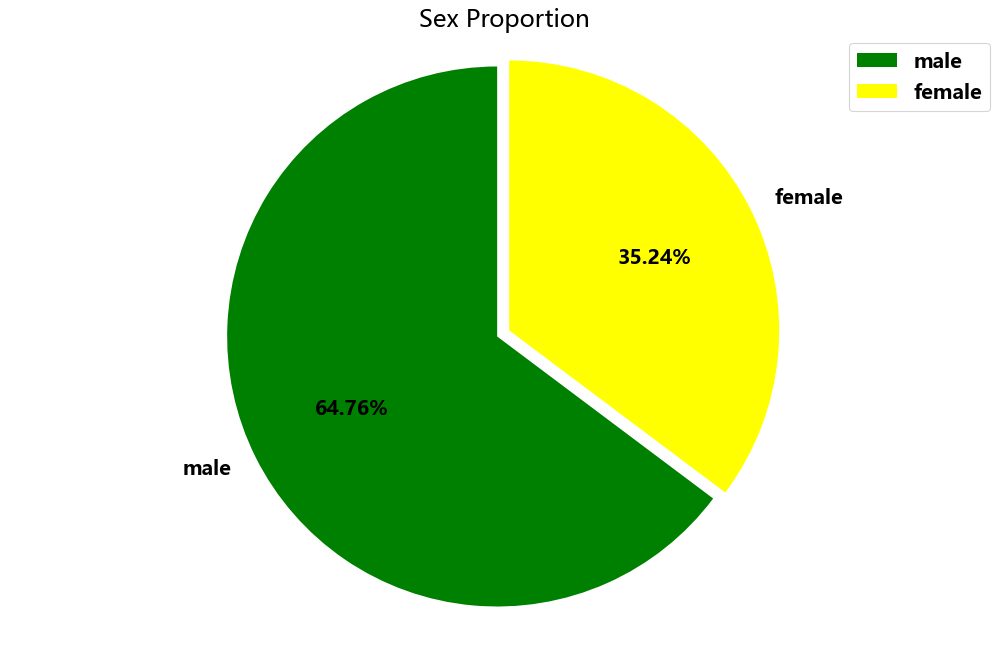

In [79]:
import matplotlib
#设置画图字体格式
font = {'family':'MicroSoft YaHei', 'weight':'bold', 'size': 18}
matplotlib.rc('font', **font)
#设置图片大小和分辨率
plt.figure(figsize=(16, 10), dpi=80)

labels = titanic['Sex'].unique() #定义标签
sizes =  titanic['Sex'].value_counts() #每块值
colors = ['green', 'yellow'] #每块颜色定义
explode = (0.05,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.title('Sex Proportion')
plt.legend() # 右上角显示
plt.show()

### 步骤6 绘制一个展示船票Fare, 与乘客年龄和性别的散点图

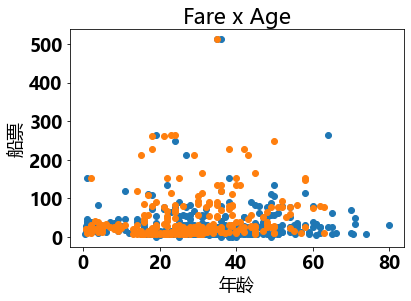

In [80]:
#方法一：
plt.scatter(titanic[titanic['Sex'] == 'male']['Age'], titanic[titanic['Sex'] == 'male']['Fare'], label='male')
plt.scatter(titanic[titanic['Sex'] == 'female']['Age'], titanic[titanic['Sex'] == 'female']['Fare'], label='female')

plt.xlabel("年龄")
plt.ylabel("船票")
plt.title("Fare x Age")
plt.show()

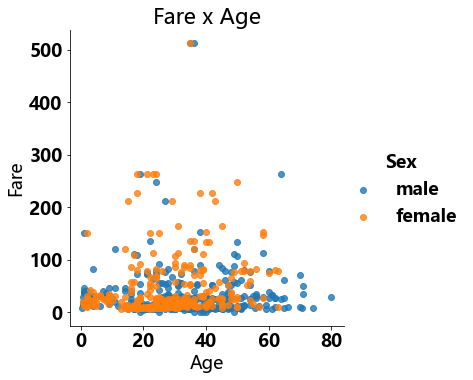

In [81]:
#方法二：
lm = sns.lmplot(x='Age', y='Fare', data=titanic, hue='Sex', fit_reg=False)
lm.set(title='Fare x Age')

### 步骤7 有多少人生还？

In [82]:
titanic['Survived'].sum()

342

### 步骤8 绘制一个展示船票价格的直方图

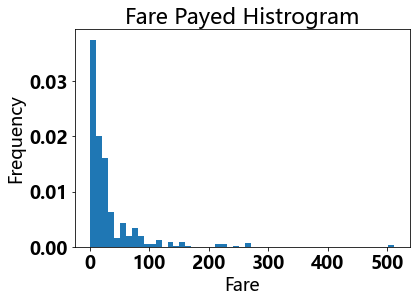

In [83]:
d = 10 #设置组距
num_bins = int((titanic['Fare'].max() - titanic['Fare'].min())//d)
plt.hist(titanic['Fare'], num_bins, density=True)  
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()

# 练习8 - 创建数据框
## 探索Pokemon数据

### 步骤1 导入必要的库

In [84]:
import pandas as pd

### 步骤2 创建一个数据字典

In [85]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }
raw_data

{'name': ['Bulbasaur', 'Charmander', 'Squirtle', 'Caterpie'],
 'evolution': ['Ivysaur', 'Charmeleon', 'Wartortle', 'Metapod'],
 'type': ['grass', 'fire', 'water', 'bug'],
 'hp': [45, 39, 44, 45],
 'pokedex': ['yes', 'no', 'yes', 'no']}

### 步骤3 将数据字典存为一个名叫pokemon的数据框中

In [86]:
pokemon = pd.DataFrame(raw_data)
pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### 步骤4 数据框的列排序是字母顺序，请重新修改为name, type, hp, evolution, pokedex这个顺序

In [87]:
order = ['name', 'type', 'hp', 'evolution', 'pokedex']
pokemon = pokemon[order]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### 步骤5 添加一个列place

- pandas创建新的数据列:
    - 1 直接赋值
    - 2 df.apply方法
        - 实例：添加一列温度类型：
        - 1 如果最高温度大于33度就是高温
        - 2 如果最低温度低于-10度就是低温
        - 3 否则就是常温
    - 3 df.assig方法
        - 可以同时添加多个新的列
    - 4 按条件选择分组分别赋值
        - 按条件选择数据，然后随这部分数据赋值新列
- 相关资料：
    - https://www.cnblogs.com/spp666/p/11849071.html

In [88]:
pokemon['place'] = ['xian', 'beijing', 'shanghai', 'nanjing']
pokemon

<ipython-input-88-aa852dff3a8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['place'] = ['xian', 'beijing', 'shanghai', 'nanjing']


,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,xian
1,Charmander,fire,39,Charmeleon,no,beijing
2,Squirtle,water,44,Wartortle,yes,shanghai
3,Caterpie,bug,45,Metapod,no,nanjing


### 步骤6 查看每个列的数据类型

- type()
    - type() 函数如果你只有第一个参数则返回对象的类型，三个参数返回新的类型对象
- DataFrame.dtypes
    - 返回DataFrame中的dtypes
    - 这将返回一个Series，其中包含每列的数据类型。结果的索引是原始DataFrame的列。具有混合类型的列与objectdtype 一起存储
- 相关资料：
    - https://blog.csdn.net/sucreguan/article/details/84845061

In [89]:
pokemon.dtypes  #pokemon.info()

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

# 练习9 - 时间序列
## 探索Apple公司股价数据

### 步骤1 导入必要的库

In [90]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### 步骤2 数据集地址

In [91]:
filepath9 = "./data/appl_1980_2014.csv"

### 步骤3 读取数据并存为一个名叫apple的数据框

In [92]:
apple = pd.read_csv(filepath9)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 步骤4 查看每一列的数据类型

In [93]:
apple.dtypes  #apple.info()

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 步骤5 将Date这个列转换为datetime类型

In [94]:
#方法一：
#apple['Date'] = apple['Date'].astype('datetime64[ns]')
#方法二：
apple['Date'] = pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### 步骤6 将Date设置为索引

In [95]:
apple.set_index('Date', inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 步骤7 有重复的日期吗？

- duplicated()方法判断
    - 1. 判断dataframe数据某列是否重复
        - df.xxx.duplicated()
    - 2. 判断dataframe数据整行是否重复
        - df.duplicated()
    - 3. 判断dataframe数据多列数据是否重复(多列组合查)
        - df.duplicated(subset = ['xxx1','xxx2'])
- drop_duplicats()方法去重（列）
    - df.drop_duplicats(subset = ['price','cnt'],keep='last',inplace=True)
- 相关资料：
    - https://www.cnblogs.com/trotl/p/11876292.html

In [96]:
#方法一：
#apple.index.is_unqiue 这个报错：'DatetimeIndex' object has no attribute 'is_unqiue'
#方法二：
apple[apple.index.duplicated()]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### 步骤8 将index设置为升序

- pandas通过索引进行排序:
    - DataFrame.sort_index(ascending=True, inplace = True)

In [97]:
apple.sort_index(ascending=True, inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### 步骤9 找到每个月的最后一个交易日(business day)

- reshape函数：
    - 用途：频率转换和重新采样时间的便捷方法
        - 对象必须具有类似日期时间的索引（DatetimeIndex，PeriodIndex或TimedeltaIndex）
        - 或传递datetime值到on或level关键字
    - 返回：Resampler object 
- df.resample(rule,how=None,axis=0,fill_method=None,closed=None,label=None,convention=start, kind=None, loffset=None,limit=None, base=0, on=None, level=None)
    - rule:“M”，“A”，“Q”，“BM”，“BA”，“BQ”，和“W”
    - 1. 频率转换：
        - s.resample('3S').asfreq()
    - 2. 上采样Upsample:
        - s.resample('30S').asfreq()[0:5]
        - s.resample('30S').pad()[0:5]  #用前面值填充后面Na
        - s.resample('30S').bfill()[0:5]#用后面值填充前面Na
    - 3. 下采样:
        - s.resample('2min').asfreq()
        - 对于下采样，closed可以设置为“左”或“右”以指定间隔的哪一端关闭：
            - s.resample('5Min', closed='left').sum()
            - s.resample('5Min', closed='right').sum()
    - 4.参数：label和loffset
        - 参数label和loffset用于处理结果标签。label指定结果是使用间隔的开头还是结尾标记。loffset对输出标签执行时间调整。
        - s.resample('5Min').sum()
        - s.resample('5Min',label='left').sum()
        - s.resample('5Min',label='left',loffset='1s').sum()
    - 5. 参数：label和closed
        - ts2.resample('M',label='right', closed='left').max() #label='right'索引为本月的最后一日即1月31日
    - 6. axis/kind参数：
        - axis=0或1允许您重新采样指定；kind='timestamp'或'period'，将结果索引转换为时间戳/时间范围表示。默认保留输入
- 重采样对象方法:
    - sum，mean，std，sem， max，min，median，first，last，ohlc
    - apply传递自定义函数
    - agg:
- 相关资料：
    - https://blog.csdn.net/tcy23456/article/details/86582835

In [98]:
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### 步骤10 数据集中最早的日期和最晚的日期相差多少天？

In [99]:
(apple.index.max() - apple.index.min()).days

12261

### 步骤11 在数据中一共有多少个月？

In [100]:
len(apple_month)

404

### 步骤12 按照时间顺序可视化Adj Close值

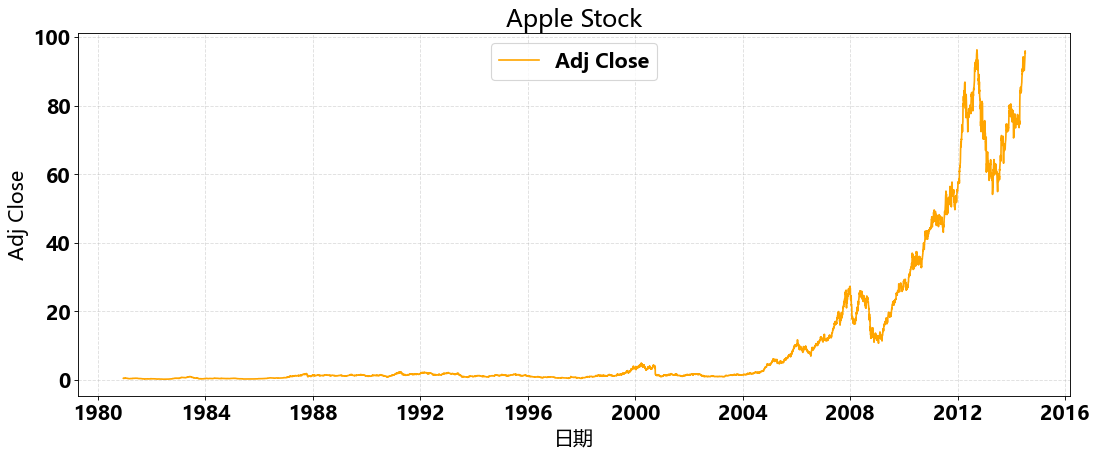

In [101]:
#方法一：
import matplotlib.pyplot as plt
import matplotlib

#设置画图字体格式
font = {'family':'MicroSoft YaHei', 'weight':'bold', 'size': 18}
matplotlib.rc('font', **font)

#设置图片大小和分辨率
plt.figure(figsize=(16, 6), dpi=80)

#绘制折线图
x = apple.index
y1 = apple['Adj Close']
plt.plot(x, y1, label='Adj Close', color='orange', linestyle='-')


#设置x,y轴标签
plt.xlabel("日期")
plt.ylabel("Adj Close")
plt.title("Apple Stock")

#绘制网格
plt.grid(alpha=0.4, linestyle='--')#alpha表示透明度

#添加图例(设置图例时，必须在绘制时，加上label字段,见上plt.plot()函数)
'''upper right;upper left;
   lower left;lower right;
   best; right; center
   center left; center right
   lower center; upper center
'''
plt.legend(loc="upper center")

#展示图
plt.show()

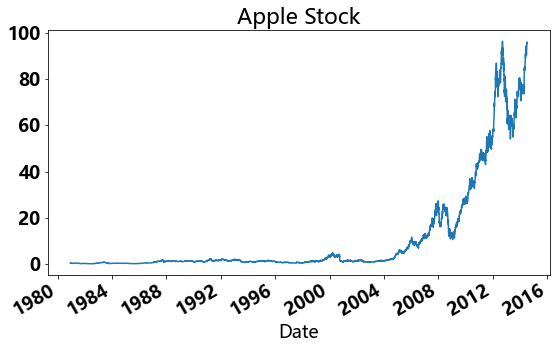

In [102]:
#方法二：
apple['Adj Close'].plot(title = 'Apple Stock').get_figure().set_size_inches(9,5)

# 练习10 - 删除数据
## 探索Iris纸鸢花数据

### 步骤1 导入必要的库

In [103]:
import pandas as pd

### 步骤2 数据集地址

In [104]:
filepath10 = './data/iris.data'

### 步骤3 将数据集存成变量iris

In [105]:
iris = pd.read_csv(filepath10, sep=',', header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 步骤4 创建数据框的列名称('sepal_length','sepal_width', 'petal_length', 'petal_width', 'class')

In [106]:
iris.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 步骤5 数据框中有缺失值吗？

In [107]:
iris.isnull().values.any()

False

### 步骤6 将列petal_length的第10到19行设置为缺失值

In [108]:
import numpy as np
iris.loc[9:18,'petal_length'] = np.nan
iris[8:20]

,sepal_length,sepal_width,petal_length,petal_width,class
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,NaN,0.1,Iris-setosa
10,5.4,3.7,NaN,0.2,Iris-setosa
11,4.8,3.4,NaN,0.2,Iris-setosa
12,4.8,3.0,NaN,0.1,Iris-setosa
13,4.3,3.0,NaN,0.1,Iris-setosa
14,5.8,4.0,NaN,0.2,Iris-setosa
15,5.7,4.4,NaN,0.4,Iris-setosa
16,5.4,3.9,NaN,0.4,Iris-setosa
17,5.1,3.5,NaN,0.3,Iris-setosa


### 步骤7 将缺失值全部替换为1.0

In [109]:
iris.fillna(value=1.0, inplace=True)
iris[8:20]

,sepal_length,sepal_width,petal_length,petal_width,class
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.0,0.1,Iris-setosa
10,5.4,3.7,1.0,0.2,Iris-setosa
11,4.8,3.4,1.0,0.2,Iris-setosa
12,4.8,3.0,1.0,0.1,Iris-setosa
13,4.3,3.0,1.0,0.1,Iris-setosa
14,5.8,4.0,1.0,0.2,Iris-setosa
15,5.7,4.4,1.0,0.4,Iris-setosa
16,5.4,3.9,1.0,0.4,Iris-setosa
17,5.1,3.5,1.0,0.3,Iris-setosa


### 步骤8 删除列class

In [110]:
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 步骤9 将数据框前三行设置为缺失值

In [111]:
iris.loc[:3] = np.NaN
iris

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 步骤10 删除有缺失值的行

- 删除所有值缺失的行 
    - df.dropna()
- 删除所有有缺失值的列 
    - df.dropna(axis=1) 
    - df.dropna(axis='columns') 
- 删除至少有两个非缺失值的行 
    - df.dropna(thresh=2)
- 删除所有值缺失的行
    - df.dropna(how='all')
- 指定判断缺失值的列范围
    - df.dropna(subset=['name', 'born'])
- 使删除和的结果生效
    - df.dropna(inplace=True)
- 指定列的缺失值删除
    - df.toy.dropna()

- dropna( axis=0, how=‘any’, thresh=None, subset=None, inplace=False)
    - axis:
        - axis参数确定是否删除包含缺失值的行或列
        - axis=0或axis='index’删除含有缺失值的行，
        - axis=1或axis='columns’删除含有缺失值的列，
    - how参数:
        - 当我们至少有一个NA时，确定是否从DataFrame中删除行或列
        - how='all’或者how=‘any’。
        - how='all’时表示删除全是缺失值的行（列）
        - how='any’时表示删除只要含有缺失值的行（列）
- 相关资料：
    - https://blog.csdn.net/happy_wealthy/article/details/108576944

In [112]:
iris.dropna(how='any', inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 步骤11 重新设置索引

- reset_index用来重置索引，因为有时候对dataframe做处理后索引可能是乱的。
    - drop参数：
        - drop=True就是把原来的索引index列去掉，重置index。
        - drop=False就是保留原来的索引，添加重置的index。
        - 两者的区别就是有没有把原来的index去掉。
    - inplace参数：
        - inplace=False（默认）表示原数组不变，对数据进行修改之后结果给新的数组。
        - inplace=True表示直接在原数组上对数据进行修改。

In [113]:
iris.reset_index(drop=True, inplace=True) #加上drop参数，原有索引就不会成为新的列
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.6,1.4,0.2
1,5.4,3.9,1.7,0.4
2,4.6,3.4,1.4,0.3
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2
...,...,...,...,...
141,6.7,3.0,5.2,2.3
142,6.3,2.5,5.0,1.9
143,6.5,3.0,5.2,2.0
144,6.2,3.4,5.4,2.3
